<a href="https://colab.research.google.com/github/phurisk/BSC_DPDM23/blob/main/Internet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect drive

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Dict

link Data : https://data.go.th/dataset/dataset_25_02?fbclid=IwAR3fip4rhRVHIEnfSP00ox2DddICf_dKYy1hheuEcg5v7IfC4cFJ575Ir_c

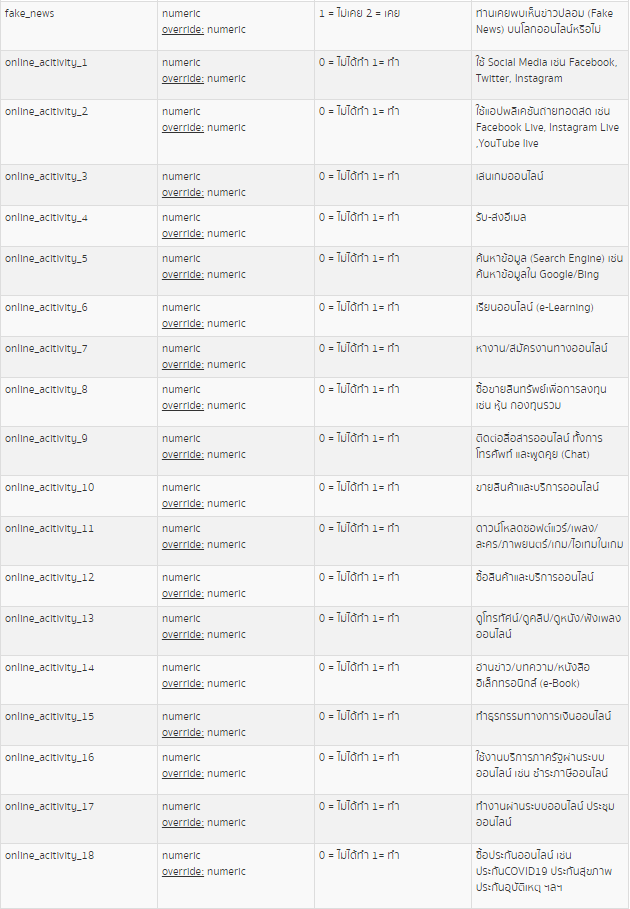

#Read Data

In [45]:
import pandas as pd

df = pd.read_excel('/content/drive/Shareddrives/Internet Behavior/raw-data-iub-2563.xlsx')

df


,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


In [46]:
count_fake_news_encounters = df[df['fake_news'] == 1].shape[0]
count_fake_news_encounters

1151

# ตรวจสอบค่า Null หรือค่าผิดปกติ ใน DataFrame

- ตรวจสอบค่าใน column fake_news ว่าเป็นค่า 1 และ  2 หรือไม่

In [47]:
# Check fake_news column
valid_fake_news = all(df['fake_news'].isin([1, 2]))
valid_fake_news

True

- ตรวจสอบค่าใน column online_acitivity ทั้งหมด ว่าเป็นค่า 0 และ  1 หรือไม่

In [48]:
# เลือกคอลัมน์ที่ 2 ถึงคอลัมน์สุดท้าย
activity_columns = df.iloc[:, 1:]

# ตรวจสอบว่าค่าทั้งหมดเป็น 0 หรือ 1
valid_values = (activity_columns.isin([0, 1])).all().all()

valid_values


False

- ตรวจสอบค่าที่ไม่ใช่ตัวเลขในข้อมูล

In [49]:
non_numeric_values = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    1
dtype: int64


- แสดง row ที่มีข้อมูลที่ไม่ใช่ตัวเลข

In [50]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
non_numeric_rows_df = df[non_numeric_rows]
non_numeric_rows_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
56,2,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,S


- ลบ row ไม่ใช่ตัวเลข (เนื่องจากมีข้อมูลที่ผิดปกติไม่เกิน 5% ของข้อมูลทั้งหมด)

In [51]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
numeric_df = df[~non_numeric_rows]
numeric_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


- ตรวจสอบค่าผิดปกติอีกครั้ง

In [52]:
non_numeric_values = numeric_df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


- หาค่า missing value จากข้อมูลทั้งหมด

In [53]:
null_values = numeric_df.isnull().sum()

print(null_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


# กำหนด Features และ Target varible (X,y)

In [54]:
data = numeric_df.copy()

In [55]:
# Features (X)
X = data.drop(columns=['fake_news'])  # คอลัมน์กิจกรรมออนไลน์ทั้งหมด

# Target variable (y)
y = data['fake_news']  # เลือกคอลัมน์ 'fake_news' เป็นตัวแปรเป้าหมาย


# จัดการ Imbalance data

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Method 1: Undersampling & Oversampling

- ปรับ train test เป็น 80% 20%

In [57]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# แบ่งข้อมูลออกเป็นชุด
X_train_OU, X_test_OU, y_train_OU, y_test_OU = train_test_split(X, y, test_size=0.2, random_state=0)

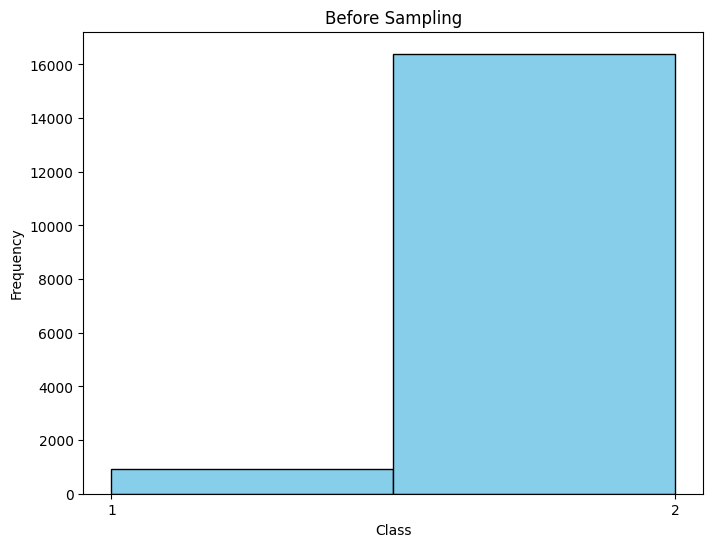

In [58]:
import matplotlib.pyplot as plt

# แสดง Histogram ของ y_train_OU ก่อนการทำ Over and Under Sampling
plt.figure(figsize=(8, 6))
plt.hist(y_train_OU, bins=2, color='skyblue', edgecolor='black')
plt.title('Before Sampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([1, 2])  # กำหนดแกน x เป็นคลาส 1 และ 2
plt.show()


### Oversampling



In [59]:
# Oversampling
oversampler = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversampler.fit_resample(X_train_OU, y_train_OU) #fit_resample ช่วยสร้างข้อมูลใหม่ในคลาส ที่มีข้อมูลน้อยกว่า และทำให้จำนวนข้อมูลในแต่ละคลาสเท่ากันหรือใกล้เคียงกัน

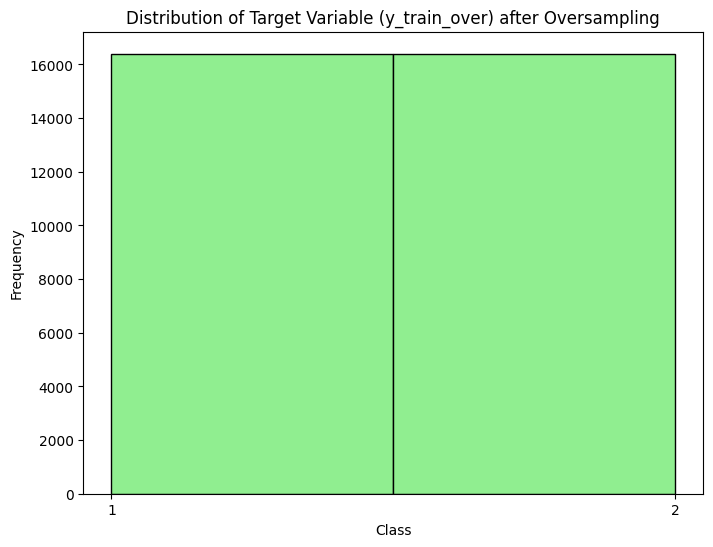

In [60]:
import matplotlib.pyplot as plt

# แสดง Histogram ของ y_train_over หลัง Oversampling
plt.figure(figsize=(8, 6))
plt.hist(y_train_over, bins=2, color='lightgreen', edgecolor='black')
plt.title('Distribution of Target Variable (y_train_over) after Oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([1, 2])  # กำหนดแกน x เป็นคลาส 1 และ 2
plt.show()


In [61]:
# ฝึกโมเดล Decision Tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=0)

In [62]:
# ทำนายบนชุดข้อมูลทดสอบ
y_pred = tree.predict(X_test_OU)

In [63]:
# วัดประสิทธิภาพของโมเดล
accuracy = accuracy_score(y_test_OU, y_pred)
precision = precision_score(y_test_OU, y_pred, average='binary')  # binary average สำหรับประสิทธิภาพของคลาสเดียว
recall = recall_score(y_test_OU, y_pred, average='binary')
f1 = f1_score(y_test_OU, y_pred, average='binary')

# แสดงค่าประสิทธิภาพของโมเดล
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7602771362586606
Precision: 0.08029197080291971
Recall: 0.33047210300429186
F1 Score: 0.12919463087248323


### Undersamplig

- การทำ Undersampling อาจช่วยให้ปรับปรุงประสิทธิภาพของโมเดลโดยลดปัญหาการที่โมเดลมีแนวโน้มที่จะเรียนรู้ความสัมพันธ์ที่ไม่ถูกต้องจากคลาสที่มีจำนวนมากกว่าคลาสที่มีจำนวนน้อย เป็นต้น อย่างไรก็ตาม การทำ Undersampling อาจทำให้สูญเสียข้อมูลที่มีความสำคัญหรือข้อมูลที่มีความหลากหลายน้อยลงไป และยังมีความเสี่ยงที่จะทำให้โมเดลไม่สามารถจำแนกคลาสที่มีความน่าสนใจได้อย่างเพียงพอ

In [64]:
# Undersampling
undersampler = RandomUnderSampler(random_state=0)
X_train_under, y_train_under = undersampler.fit_resample(X_train_OU, y_train_OU) # ทำการสุ่มตัวอย่างในคลาสที่มีจำนวนมาก ให้มีจำนวนเท่ากับคลาสที่มีจำนวนน้อย

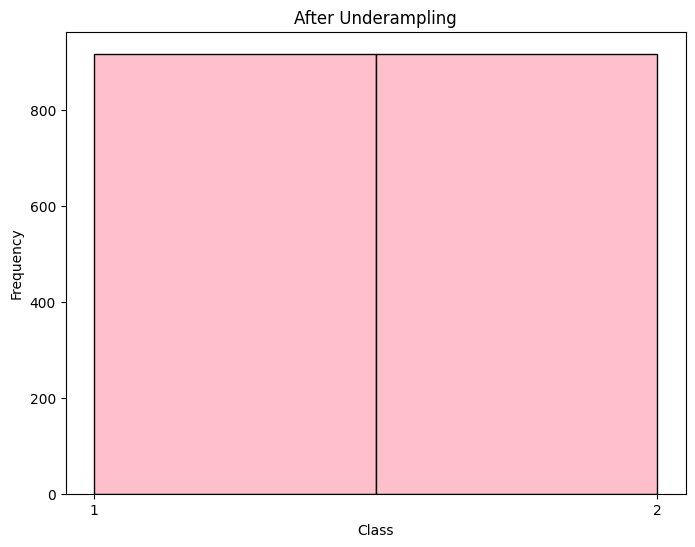

In [65]:
# แสดงกราฟ
import matplotlib.pyplot as plt

# แสดง Histogram ของ y_train_over หลัง Oversampling
plt.figure(figsize=(8, 6))
plt.hist(y_train_under, bins=2, color='pink', edgecolor='black')
plt.title('After Underampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([1, 2])  # กำหนดแกน x เป็นคลาส 1 และ 2
plt.show()

In [66]:
# ฝึกโมเดล Decision Tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_under, y_train_under)

DecisionTreeClassifier(random_state=0)

In [67]:
# ทำนายบนชุดข้อมูลทดสอบ
y_pred = tree.predict(X_test_OU)

In [68]:
# วัดประสิทธิภาพของโมเดล
accuracy = accuracy_score(y_test_OU, y_pred)
precision = precision_score(y_test_OU, y_pred, average='binary')  # binary average สำหรับประสิทธิภาพของคลาสเดียว
recall = recall_score(y_test_OU, y_pred, average='binary')
f1 = f1_score(y_test_OU, y_pred, average='binary')

# แสดงค่าประสิทธิภาพของโมเดล
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5339491916859123
Precision: 0.061855670103092786
Recall: 0.5407725321888412
F1 Score: 0.11101321585903083


## Method 2: Cost-sensitive Learning

In [69]:
# แบ่งข้อมูลออกเป็นชุด
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X, y, test_size=0.2, random_state=0)


In [70]:
# แทนที่ '2' ด้วย '1' และ '1' ด้วย '0' ในคลาส เพราะ Cost-sensitive Learning ต้องใช้ตัวเลขที่เป็นไบนารีเท่านั้น หรือ 0 , 1
y_train_binary = y_train_cost.replace({2: 1, 1: 0})
y_test_binary = y_test_cost.replace({2: 1, 1: 0})

# ปรับน้ำหนัก โมเดลจะให้ความสำคัญกับคลาสที่มีค่าเป็น 1 มากกว่าคลาสที่มีค่าเป็น 0
class_weights = {0: 1, 1: 10}  # คลาสที่มีค่าเป็น 0 จะมีค่าน้ำหนักเท่ากับ 1 คลาสที่มีค่าเป็น 1 จะมีค่าน้ำหนักเท่ากับ 10

# Train  model
tree = DecisionTreeClassifier(random_state=0, class_weight=class_weights)
tree.fit(X_train_cost, y_train_binary)

# Predict test set
y_pred = tree.predict(X_test_cost)

# ประเมิน model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# แสดงค่าประสิทธิภาพของโมเดล
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:, {precision:.4f}")
print(f"Recall:, {recall:.4f}")
print(f"F1 Score:, {f1:.4f}")


Accuracy: 0.9321
Precision:, 0.9469
Recall:, 0.9834
F1 Score:, 0.9648


## Method 3: Class Weight Adjustment

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# แบ่งชุดข้อมูลเป็นชุดtrainและชุดtest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# สร้างโมเดล Decision Tree โดยใช้การปรับน้ำหนักของคลาส
clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')

# ฝึกโมเดลด้วยชุดข้อมูลtrain
clf.fit(X_train, y_train)

# ทำนายผลลัพธ์ด้วยชุดข้อมูลtest
y_pred = clf.predict(X_test)

# คำนวณและพิมพ์ความแม่นยำของโมเดล
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:, {precision:.4f}")
print(f"Recall:, {recall:.4f}")
print(f"F1 Score:, {f1:.4f}")

Accuracy: 0.7640
Precision:, 0.0808
Recall:, 0.3262
F1 Score:, 0.1295


## Method 4: Synthetic Sample Generation

In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# แบ่งชุดข้อมูลเป็นชุดฝึกอบรมและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ใช้ SMOTE เพื่อสร้างข้อมูลสังเคราะห์สำหรับคลาสที่มีจำนวนน้อยในชุดฝึกอบรม
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# สร้างและฝึกโมเดล Decision Tree ด้วยชุดข้อมูลที่ได้จาก SMOTE
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_smote, y_train_smote)

# ทำนายผลลัพธ์และคำนวณความแม่นยำ
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:, {precision:.4f}")
print(f"Recall:, {recall:.4f}")
print(f"F1 Score:, {f1:.4f}")

Accuracy: 0.7640
Precision:, 0.0808
Recall:, 0.3262
F1 Score:, 0.1295


# หาค่าพารามิเตอร์ที่เหมาะสมสำหรับ Decition tree


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# ตั้งค่าพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# สร้างโมเดล Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# สร้าง GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# ฝึกโมเดลด้วย GridSearchCV
grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


#สร้าง Decision tree

In [123]:
# แทนที่ '2' ด้วย '1' และ '1' ด้วย '0' ในคลาส เพราะ Cost-sensitive Learning ต้องใช้ตัวเลขที่เป็นไบนารีเท่านั้น หรือ 0 , 1
y_train_binary = y_train_cost.replace({2: 1, 1: 0})
y_test_binary = y_test_cost.replace({2: 1, 1: 0})

# ปรับน้ำหนัก โมเดลจะให้ความสำคัญกับคลาสที่มีค่าเป็น 1 มากกว่าคลาสที่มีค่าเป็น 0
class_weights = {0: 1, 1: 10}  # คลาสที่มีค่าเป็น 0 จะมีค่าน้ำหนักเท่ากับ 1 คลาสที่มีค่าเป็น 1 จะมีค่าน้ำหนักเท่ากับ 10

# Train  model
tree = DecisionTreeClassifier(random_state=0, class_weight=class_weights,max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)
tree.fit(X_train_cost, y_train_binary)


DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=3, random_state=0)

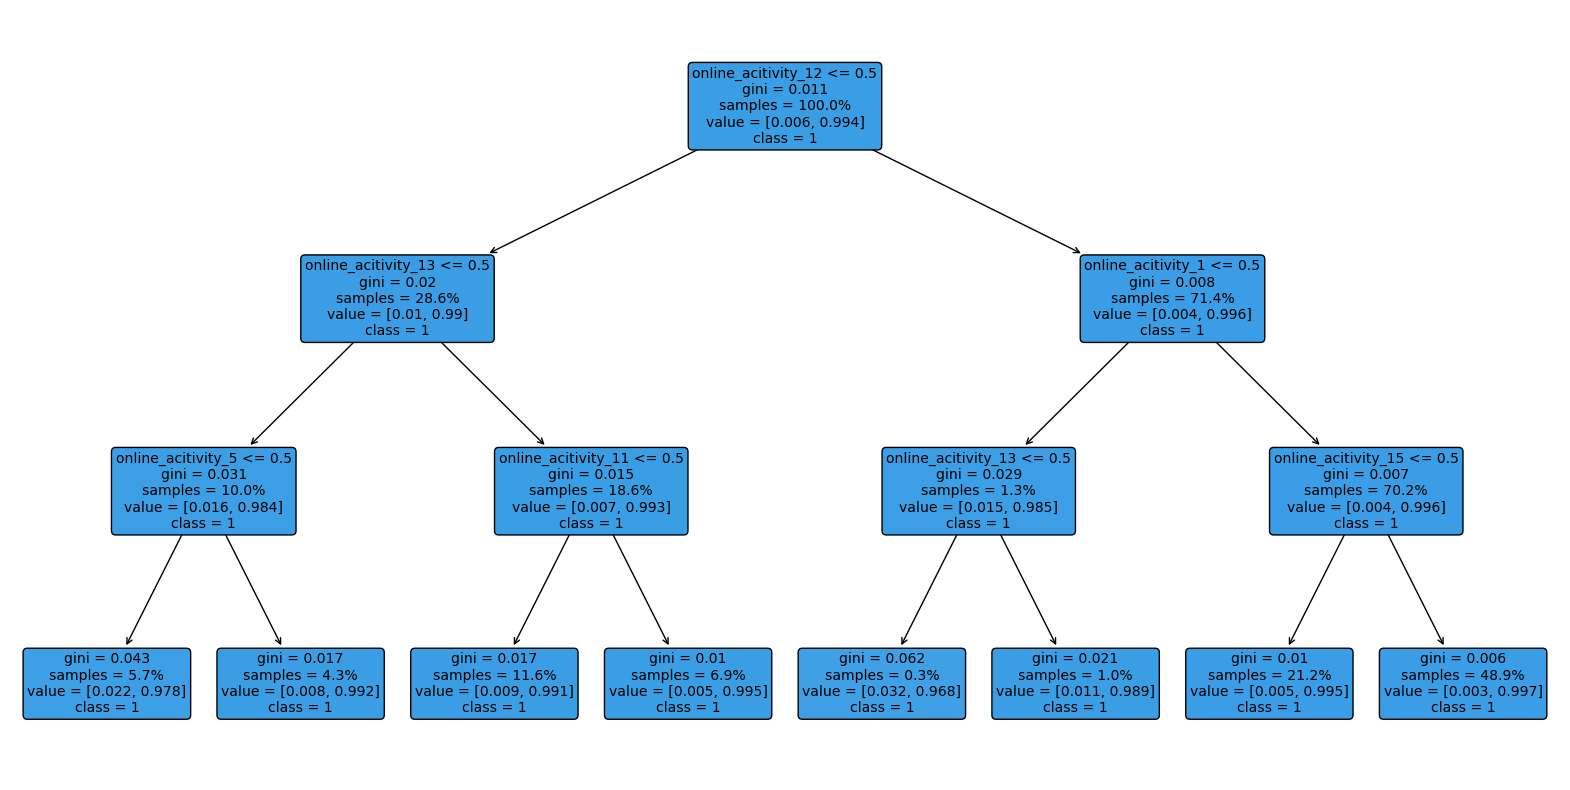

In [124]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# สร้างรูปภาพของต้นไม้
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train_cost.columns, class_names=['0', '1'], proportion=True, rounded=True)
plt.show()


In [125]:
# Predict test set
y_pred = tree.predict(X_test_cost)
# ประเมิน model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# แสดงค่าประสิทธิภาพของโมเดล
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision:, {precision:.4f}")
print(f"Recall:, {recall:.4f}")
print(f"F1 Score:, {f1:.4f}")

Accuracy: 0.9462
Precision:, 0.9462
Recall:, 1.0000
F1 Score:, 0.9724


# Oversampling + Cost-sensitive + class weight




### Train

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# แบ่งข้อมูลออกเป็นชุด
X_train_OU, X_test_OU, y_train_OU, y_test_OU = train_test_split(X, y, test_size=0.2, random_state=0)

# ใช้ Oversampling
oversampler = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversampler.fit_resample(X_train_OU, y_train_OU)


# Predict on the test set
y_pred = tree.predict(X_test_OU)  # Use the original test set for prediction

# Replace class labels '2' with '1' and '1' with '0' for cost-sensitive learning
y_train_binary = y_train_over.replace({2: 1, 1: 0})
y_test_binary = y_test_OU.replace({2: 1, 1: 0})  # Use the original test set for evaluation

# Define class weights for cost-sensitive learning
class_weights = {0: 1, 1: 10}  # Higher weight for minority class

# Train decision tree model with cost-sensitive learning
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced' ,max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)
tree.fit(X_train_over, y_train_binary)  # Use oversampled data for training

# Predict on the test set
y_pred = tree.predict(X_test_OU)

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# Display performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7654
Precision: 0.9630
Recall: 0.7820
F1 Score: 0.8631


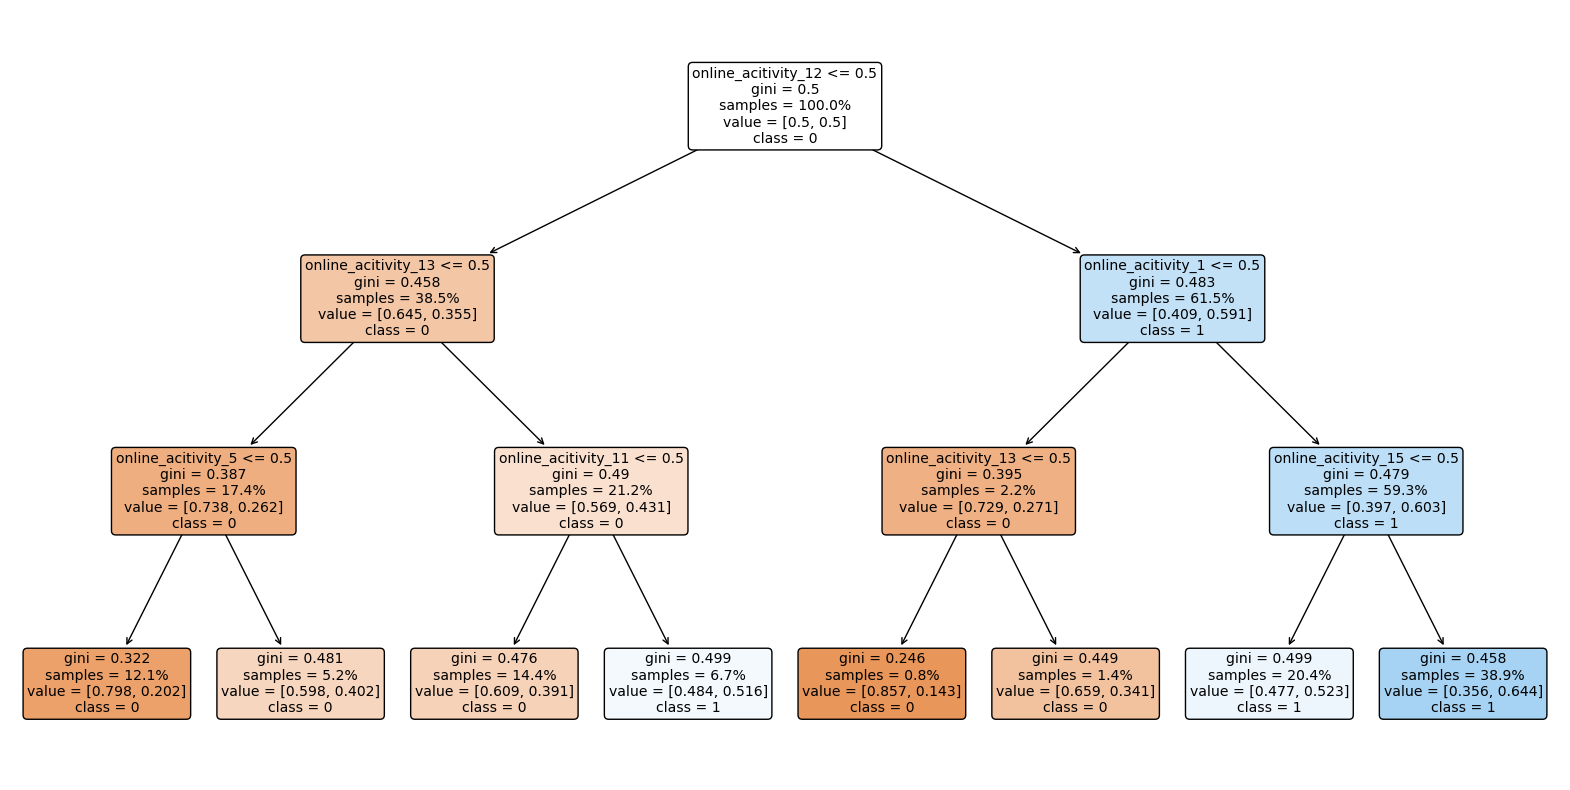

In [127]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# สร้างรูปภาพของต้นไม้
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train_cost.columns, class_names=['0', '1'], proportion=True, rounded=True)
plt.show()